# Prep

In [1]:
import json
import numpy as np
import os
import pandas as pd
import plotnine as gg
gg.theme_set(gg.theme_classic)
default_figure_size = (6.4, 4.8)

In [2]:
# data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/mTurk1'
data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34'
plot_dir = data_dir + 'figures'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

## Get all_data

In [3]:
all_data = pd.read_csv(os.path.join(data_dir, 'all_data_raw.csv'), index_col=0)
all_data

,rt,stimulus,key_press,trial_type,trial_index,time_elapsed,internal_node_id,phase,block,trial,...,count_item3,count_star0,count_star1,count_star2,count_star3,star_rule,star0_inplace,star1_inplace,star2_inplace,star3_inplace
0,797.865,0.0,85.0,learning,297.0,2422963.0,0.0-77.0-0.0,high,0.0,0.0,...,0,0,0,0,0,"[2, 3]",False,False,False,False
1,654.720,0.0,73.0,learning,298.0,2423619.0,0.0-77.0-1.0,high,0.0,0.0,...,0,0,0,0,0,"[2, 3]",False,False,False,False
2,1317.900,0.0,79.0,learning,299.0,2424938.0,0.0-77.0-2.0,high,0.0,0.0,...,0,0,0,0,0,"[2, 3]",False,False,False,False
3,276.305,0.0,80.0,learning,300.0,2425216.0,0.0-77.0-3.0,high,0.0,0.0,...,0,0,0,0,0,"[2, 3]",False,False,False,False
4,823.310,0.0,85.0,learning,302.0,2426546.0,0.0-78.0-0.0,high,0.0,1.0,...,0,0,0,0,0,"[2, 3]",False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290975,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,7.0,23.0,...,11,3,0,0,0,"[2, 1]",True,True,True,True
286797,884.860,0.0,79.0,transfer,2790.0,1240253.0,0.0-595.0-0.0,low,7.0,24.0,...,11,3,0,0,0,"[2, 1]",True,True,True,True
286798,203.660,0.0,80.0,transfer,2791.0,1240463.0,0.0-595.0-1.0,low,7.0,24.0,...,11,3,0,0,0,"[2, 1]",True,True,True,True
286799,262.600,0.0,73.0,transfer,2792.0,1240731.0,0.0-595.0-2.0,low,7.0,24.0,...,11,3,0,0,0,"[2, 1]",True,True,True,True


## Get demographics questionnaire

In [4]:
demographics = pd.read_csv(os.path.join(data_dir, 'Demographics.csv'), header=1)
demographics = demographics.rename(columns={'id': 'sid'})
demographics.sid = demographics.sid.astype('int')
demographics

,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,Do you have a history of alcoholism?,Are you currently taking any prescription medication?,"If so, please provide the specific medications and doses:",Have you taken any over-the-counter medications today?,"If so, please provide the specific medications and doses:.1",Have you ever experienced a head trauma resulting in a loss of consciousness or been diagnosed with a neurological impairment or illness?,"If so, please describe below:",sid,cond,Create New Field or Choose From Dropdown...
0,7/15/2020 1:37,7/15/2020 1:39,IP Address,100,82,True,7/15/2020 1:39,R_1mkqn7XYRiZ11Kl,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,11311,rpp,NaN
1,7/15/2020 10:08,7/15/2020 10:08,IP Address,100,51,True,7/15/2020 10:08,R_1NUxGUE5Kz1Ws8N,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,31309,rpp,NaN
2,7/15/2020 10:16,7/15/2020 10:16,IP Address,100,19,True,7/15/2020 10:16,R_3gMjRx6S0Iz0Jxn,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,31309,rpp,NaN
3,7/15/2020 10:19,7/15/2020 10:20,IP Address,100,60,True,7/15/2020 10:20,R_bPcZwHcFFtCfmp3,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,36766,rpp,NaN
4,7/15/2020 12:04,7/15/2020 12:06,IP Address,100,117,True,7/15/2020 12:06,R_CkVhwlQeFfPQMUN,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,19774,rpp,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10/19/2020 17:27,10/19/2020 17:31,IP Address,100,230,True,10/19/2020 17:31,R_3dVV50qtdK6KMRJ,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,38470,rpp,NaN
111,10/21/2020 10:54,10/21/2020 10:55,IP Address,100,41,True,10/21/2020 10:55,R_UnmfRFR5074LtYd,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,39334,rpp,NaN
112,10/21/2020 11:40,10/21/2020 11:41,IP Address,100,50,True,10/21/2020 11:41,R_2BnEHDuvAenJf41,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,26179,rpp,NaN
113,10/22/2020 21:59,10/22/2020 22:04,IP Address,100,244,True,10/22/2020 22:04,R_2OVKYXAMQlkEtZO,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,38197,rpp,NaN


In [5]:
# Subset participants of current dataset
demo = demographics.loc[demographics['sid'].isin(np.unique(all_data['sid']))].reset_index(drop=True)
demo

,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,Do you have a history of alcoholism?,Are you currently taking any prescription medication?,"If so, please provide the specific medications and doses:",Have you taken any over-the-counter medications today?,"If so, please provide the specific medications and doses:.1",Have you ever experienced a head trauma resulting in a loss of consciousness or been diagnosed with a neurological impairment or illness?,"If so, please describe below:",sid,cond,Create New Field or Choose From Dropdown...
0,7/21/2020 23:04,7/21/2020 23:05,IP Address,100,64,True,7/21/2020 23:05,R_2TyKkuQLWfoRxTD,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,36718,rpp,NaN
1,7/22/2020 1:22,7/22/2020 1:24,IP Address,100,118,True,7/22/2020 1:24,R_9poSkvJvE0yqOMV,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,36790,rpp,NaN
2,7/22/2020 3:04,7/22/2020 3:07,IP Address,100,143,True,7/22/2020 3:07,R_xcjv9I3pczlGch3,anonymous,EN,...,No,No,NaN,Yes,cold medicine,No,NaN,36913,rpp,NaN
3,7/22/2020 22:23,7/22/2020 22:24,IP Address,100,85,True,7/22/2020 22:24,R_2bIyyeA4QD3myIB,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,36865,rpp,NaN
4,7/22/2020 22:50,7/22/2020 22:51,IP Address,100,70,True,7/22/2020 22:51,R_1ih67IqGsaXuVh8,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,14239,rpp,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,10/19/2020 17:27,10/19/2020 17:31,IP Address,100,230,True,10/19/2020 17:31,R_3dVV50qtdK6KMRJ,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,38470,rpp,NaN
79,10/21/2020 10:54,10/21/2020 10:55,IP Address,100,41,True,10/21/2020 10:55,R_UnmfRFR5074LtYd,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,39334,rpp,NaN
80,10/21/2020 11:40,10/21/2020 11:41,IP Address,100,50,True,10/21/2020 11:41,R_2BnEHDuvAenJf41,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,26179,rpp,NaN
81,10/22/2020 21:59,10/22/2020 22:04,IP Address,100,244,True,10/22/2020 22:04,R_2OVKYXAMQlkEtZO,anonymous,EN,...,No,No,NaN,No,NaN,No,NaN,38197,rpp,NaN


In [6]:
# Remove duplicate entries
already_ids = []

for i, sid in enumerate(demo['sid']):
    if sid in already_ids:
        print("Removing duplicate entry for participant {}.".format(sid))
        demo = demo.drop(i)
    already_ids += [sid]
demo = demo.reset_index(drop=True)
demo.shape

Removing duplicate entry for participant 36826.
Removing duplicate entry for participant 31306.
Removing duplicate entry for participant 38389.
Removing duplicate entry for participant 38389.
Removing duplicate entry for participant 34453.
Removing duplicate entry for participant 38389.
Removing duplicate entry for participant 31552.
Removing duplicate entry for participant 37036.
Removing duplicate entry for participant 37036.
Removing duplicate entry for participant 34453.


(73, 37)

In [7]:
q_sex = 'What is your sex?'
q_age_y = 'What is your age? (in years and months, e.g. 23 years & 3 months) - Years'
q_age_m = 'What is your age? (in years and months, e.g. 23 years & 3 months) - Months'

demo = demo.rename(columns={q_sex: 'sex', q_age_y: 'age_years', q_age_m: 'age_months'})

In [8]:
# Add stuff to all_data
print(all_data.shape)
all_data = pd.merge(all_data, demo[['sid', 'sex', 'age_years', 'age_months']])
print(all_data.shape)
all_data

(290976, 82)
(290976, 85)


,rt,stimulus,key_press,trial_type,trial_index,time_elapsed,internal_node_id,phase,block,trial,...,count_star2,count_star3,star_rule,star0_inplace,star1_inplace,star2_inplace,star3_inplace,sex,age_years,age_months
0,797.865,0.0,85.0,learning,297.0,2422963.0,0.0-77.0-0.0,high,0.0,0.0,...,0,0,"[2, 3]",False,False,False,False,Female,21.0,6.0
1,654.720,0.0,73.0,learning,298.0,2423619.0,0.0-77.0-1.0,high,0.0,0.0,...,0,0,"[2, 3]",False,False,False,False,Female,21.0,6.0
2,1317.900,0.0,79.0,learning,299.0,2424938.0,0.0-77.0-2.0,high,0.0,0.0,...,0,0,"[2, 3]",False,False,False,False,Female,21.0,6.0
3,276.305,0.0,80.0,learning,300.0,2425216.0,0.0-77.0-3.0,high,0.0,0.0,...,0,0,"[2, 3]",False,False,False,False,Female,21.0,6.0
4,823.310,0.0,85.0,learning,302.0,2426546.0,0.0-78.0-0.0,high,0.0,1.0,...,0,0,"[2, 3]",False,False,False,False,Female,21.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290971,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,7.0,23.0,...,0,0,"[2, 1]",True,True,True,True,Male,18.0,10.0
290972,884.860,0.0,79.0,transfer,2790.0,1240253.0,0.0-595.0-0.0,low,7.0,24.0,...,0,0,"[2, 1]",True,True,True,True,Male,18.0,10.0
290973,203.660,0.0,80.0,transfer,2791.0,1240463.0,0.0-595.0-1.0,low,7.0,24.0,...,0,0,"[2, 1]",True,True,True,True,Male,18.0,10.0
290974,262.600,0.0,73.0,transfer,2792.0,1240731.0,0.0-595.0-2.0,low,7.0,24.0,...,0,0,"[2, 1]",True,True,True,True,Male,18.0,10.0


## Get strategy questionnaire

In [9]:
strategies = pd.read_csv(os.path.join(data_dir, 'StrategyQuestionnaire.csv'), header=1)
strategies = strategies[1:]  # Remove first row with "ImportId":"startDate","timeZone":"Ameri, ...
strategies = strategies.rename(columns={'id': 'sid'})
strategies.sid = strategies.sid.astype('int')
strategies

,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,Did the rules change about halfway through the first machine?,Did the rules change about halfway through the second machine?,How did the rules change for the first machine?,How did the rules change for the second machine?,Which hand did you use to play the first machine?,Which hand did you use to play the second machine?,"Did you use pen and paper or any other external device (e.g., cell phone) to help in this task? E.g., some people write down keys to help them memorize and perform better.",How did you use the device? Describe your strategy.,Is there anything you'd like to tell us?,sid
1,2020-07-21 23:47:39,2020-07-21 23:51:49,IP Address,100,250,True,2020-07-21 23:51:49,R_3RgznnDB2GI0inn,anonymous,EN,...,"Yes, rules changed","No, rules did not change",The keys make different tools after I reach 10...,The rule didn't change.,Left hand,Right hand,NaN,NaN,NaN,36718
2,2020-07-22 02:00:46,2020-07-22 02:11:05,IP Address,100,619,True,2020-07-22 02:11:05,R_22WwgydALqTXYAc,anonymous,EN,...,"Yes, rules changed","Yes, rules changed",Keys for two of the four elements changed. But...,The 2 elements required for 2 of the four star...,Left hand,Right hand,NaN,NaN,Interesting game.,36790
3,2020-07-22 03:49:40,2020-07-22 03:53:04,IP Address,100,204,True,2020-07-22 03:53:04,R_3lGspaZBXZEB1ps,anonymous,EN,...,"Yes, rules changed","Yes, rules changed",I wasn't able to solve it.,The combinations for 2 colors changed. I'm ass...,Right hand,Both hands,NaN,NaN,NaN,36913
4,2020-07-22 23:03:55,2020-07-22 23:11:40,IP Address,100,464,True,2020-07-22 23:11:40,R_3n8kSw1DetuSs9O,anonymous,EN,...,"Yes, rules changed","No, rules did not change",The keys to make some of the symbols were diff...,I don't think they changed from my knowledge o...,Right hand,Left hand,NaN,NaN,I am not very good at typing (I am mainly a tw...,36865
5,2020-07-22 23:28:13,2020-07-22 23:30:15,IP Address,100,122,True,2020-07-22 23:30:15,R_3gXVQincJIocSC1,anonymous,EN,...,"Yes, rules changed","No, rules did not change",It seemed that different patterns were going t...,I don't think the rules changed for the second...,Both hands,Both hands,NaN,NaN,nope!,14239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2020-10-19 18:36:14,2020-10-19 18:39:59,IP Address,100,224,True,2020-10-19 18:39:59,R_1QowIIRX7uqf1li,anonymous,EN,...,"No, rules did not change","Yes, rules changed",I don't believe they did.,I believe the combination of tools for the bro...,Right hand,Left hand,"No, I did not use any external device to help ...",NaN,NaN,38470
81,2020-10-21 11:26:07,2020-10-21 11:27:50,IP Address,100,103,True,2020-10-21 11:27:51,R_2VgA2fECtnC8Dwh,anonymous,EN,...,"Yes, rules changed","No, rules did not change",I think different letters became assigned to d...,NaN,Both hands,Both hands,"No, I did not use any external device to help ...",NaN,NaN,39334
82,2020-10-21 12:17:01,2020-10-21 12:19:34,IP Address,100,152,True,2020-10-21 12:19:34,R_43c9Af97NvL25nb,anonymous,EN,...,"No, rules did not change","No, rules did not change",NaN,NaN,Left hand,Right hand,"No, I did not use any external device to help ...",NaN,NaN,26179
83,2020-10-22 22:49:28,2020-10-22 22:52:53,IP Address,100,204,True,2020-10-22 22:52:53,R_22GrzGehKiFFFke,anonymous,EN,...,"Yes, rules changed","No, rules did not change",The patterns seem to have changed to create th...,the speed changed,Left hand,Right hand,"No, I did not use any external device to help ...",I didn't know I was allowed to use anything ot...,NaN,38197


In [10]:
# Subset participants of current dataset
strat = strategies.loc[strategies['sid'].isin(np.unique(all_data['sid']))].reset_index(drop=True)
strat

,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,Did the rules change about halfway through the first machine?,Did the rules change about halfway through the second machine?,How did the rules change for the first machine?,How did the rules change for the second machine?,Which hand did you use to play the first machine?,Which hand did you use to play the second machine?,"Did you use pen and paper or any other external device (e.g., cell phone) to help in this task? E.g., some people write down keys to help them memorize and perform better.",How did you use the device? Describe your strategy.,Is there anything you'd like to tell us?,sid
0,2020-07-21 23:47:39,2020-07-21 23:51:49,IP Address,100,250,True,2020-07-21 23:51:49,R_3RgznnDB2GI0inn,anonymous,EN,...,"Yes, rules changed","No, rules did not change",The keys make different tools after I reach 10...,The rule didn't change.,Left hand,Right hand,NaN,NaN,NaN,36718
1,2020-07-22 02:00:46,2020-07-22 02:11:05,IP Address,100,619,True,2020-07-22 02:11:05,R_22WwgydALqTXYAc,anonymous,EN,...,"Yes, rules changed","Yes, rules changed",Keys for two of the four elements changed. But...,The 2 elements required for 2 of the four star...,Left hand,Right hand,NaN,NaN,Interesting game.,36790
2,2020-07-22 03:49:40,2020-07-22 03:53:04,IP Address,100,204,True,2020-07-22 03:53:04,R_3lGspaZBXZEB1ps,anonymous,EN,...,"Yes, rules changed","Yes, rules changed",I wasn't able to solve it.,The combinations for 2 colors changed. I'm ass...,Right hand,Both hands,NaN,NaN,NaN,36913
3,2020-07-22 23:03:55,2020-07-22 23:11:40,IP Address,100,464,True,2020-07-22 23:11:40,R_3n8kSw1DetuSs9O,anonymous,EN,...,"Yes, rules changed","No, rules did not change",The keys to make some of the symbols were diff...,I don't think they changed from my knowledge o...,Right hand,Left hand,NaN,NaN,I am not very good at typing (I am mainly a tw...,36865
4,2020-07-22 23:28:13,2020-07-22 23:30:15,IP Address,100,122,True,2020-07-22 23:30:15,R_3gXVQincJIocSC1,anonymous,EN,...,"Yes, rules changed","No, rules did not change",It seemed that different patterns were going t...,I don't think the rules changed for the second...,Both hands,Both hands,NaN,NaN,nope!,14239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2020-10-19 18:36:14,2020-10-19 18:39:59,IP Address,100,224,True,2020-10-19 18:39:59,R_1QowIIRX7uqf1li,anonymous,EN,...,"No, rules did not change","Yes, rules changed",I don't believe they did.,I believe the combination of tools for the bro...,Right hand,Left hand,"No, I did not use any external device to help ...",NaN,NaN,38470
69,2020-10-21 11:26:07,2020-10-21 11:27:50,IP Address,100,103,True,2020-10-21 11:27:51,R_2VgA2fECtnC8Dwh,anonymous,EN,...,"Yes, rules changed","No, rules did not change",I think different letters became assigned to d...,NaN,Both hands,Both hands,"No, I did not use any external device to help ...",NaN,NaN,39334
70,2020-10-21 12:17:01,2020-10-21 12:19:34,IP Address,100,152,True,2020-10-21 12:19:34,R_43c9Af97NvL25nb,anonymous,EN,...,"No, rules did not change","No, rules did not change",NaN,NaN,Left hand,Right hand,"No, I did not use any external device to help ...",NaN,NaN,26179
71,2020-10-22 22:49:28,2020-10-22 22:52:53,IP Address,100,204,True,2020-10-22 22:52:53,R_22GrzGehKiFFFke,anonymous,EN,...,"Yes, rules changed","No, rules did not change",The patterns seem to have changed to create th...,the speed changed,Left hand,Right hand,"No, I did not use any external device to help ...",I didn't know I was allowed to use anything ot...,NaN,38197


# Exclude Participants

In [11]:
min_points_chance_performer = 25
max_missed_trials_inattentive = 50
dur_criterion = 60

## Psychological disorder, head trauma

In [12]:
q_psych = "Have you ever been diagnosed with Parkinson's disease, schizophrenia, obsessive compulsive disorder, depression, or other mental/psychiatric illness(es)?"
q_trauma = "Have you ever experienced a head trauma resulting in a loss of consciousness or been diagnosed with a neurological impairment or illness?"

psych_sids = demo.loc[demo[q_psych] == 'Yes', 'sid'].values
trauma_sids = demo.loc[demo[q_trauma] == 'Yes', 'sid'].values

psych_sids, trauma_sids

(array([35437, 32713]), array([31552, 23638]))

## Bad performance

In [13]:
# Add chance performer column to all_data
id_cols = ['sid', 'phase', 'trial_type']
chance_performers1 = all_data.groupby(id_cols).aggregate('mean')['points'].reset_index()
chance_performers1 = chance_performers1.groupby(['sid']).aggregate('count')['phase'].reset_index()
chance_performers1

,sid,phase
0,13885,4
1,14239,4
2,15670,4
3,16849,4
4,23638,4
...,...,...
68,39334,4
69,39508,4
70,39514,4
71,39520,4


In [14]:
chance_performers2 = all_data.groupby(id_cols).aggregate('mean').reset_index()[id_cols + ['acc']]
chance_performers2['points'] = chance_performers2['acc'] * (np.max(all_data.trial_) + 1)
chance_performers2

,sid,phase,trial_type,acc,points
0,13885,high,learning,0.423333,127.000000
1,13885,high,transfer,0.402010,120.603015
2,13885,low,learning,0.496667,149.000000
3,13885,low,transfer,0.542714,162.814070
4,14239,high,learning,0.208054,62.416107
...,...,...,...,...,...
287,39520,low,transfer,0.456853,137.055838
288,39925,high,learning,0.289562,86.868687
289,39925,high,transfer,0.420000,126.000000
290,39925,low,learning,0.064626,19.387755


In [15]:
chance_performers = set(
    list(chance_performers1.loc[chance_performers1['phase'] == 1, 'sid']) + \
    list(set(chance_performers2.loc[
        (chance_performers2.trial_type == 'learning') & 
        (chance_performers2.points < min_points_chance_performer), 'sid']))
)

print("Chance performer ids: {}".format(chance_performers))

Chance performer ids: {24964, 31684, 31306, 36880, 39925, 27517, 14239}


## Too many missed trials

In [16]:
d = all_data.loc[np.isnan(all_data['key_press'])].groupby(['sid']).aggregate('sum').reset_index()[['sid', 'timeout']]

inattentives = d.loc[d['timeout'] > max_missed_trials_inattentive].sid.values

print("Inattentive participant ids: {}".format(inattentives))

Inattentive participant ids: [31306 31684 37552 38131 39139 39514]


In [17]:
print(
    "Average missed trials: {} (sd: {}); criterion: {}".format(
        np.mean(d['timeout']).round(1), np.std(d['timeout']).round(2), max_missed_trials_inattentive)
)

Average missed trials: 17.7 (sd: 24.06); criterion: 50


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34figures\01_ChancePerformers.png
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.


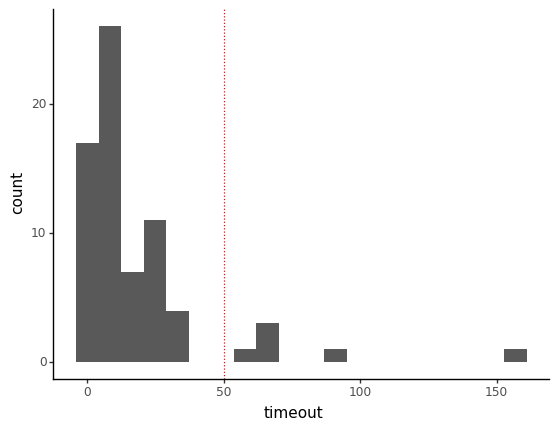

<ggplot: (166239046244)>


In [18]:
g = (gg.ggplot(d, gg.aes('timeout'))
 + gg.geom_histogram(position=gg.position_dodge(width=4))
 + gg.geom_vline(xintercept=max_missed_trials_inattentive, linetype='dotted', color='red')
)
g.save(os.path.join(plot_dir, '01_ChancePerformers.png'))
print(g)

In [19]:
num_dat = all_data.loc[all_data['phase'] == 'low'].groupby(['sid', 'phaseNum']).aggregate('mean').reset_index()[['sid', 'phaseNum']]

print('Before Excluding: High transfer first: n={}; low transfer first: n={}'.format(
    np.sum(num_dat['phaseNum'] == 0), np.sum(num_dat['phaseNum'] == 1)))

Before Excluding: High transfer first: n=36; low transfer first: n=37


## Using pen and paper

In [20]:
pen_paper_q = 'Did you use pen and paper or any other external device (e.g., cell phone) to help in this task? E.g., some people write down keys to help them memorize and perform better.'
yes_ans = 'Yes, I used an external device to help (pen & paper, cell phone, etc.).'
no_ans = 'No, I did not use any external device to help with the task.'

pen_paper_sids = strat.loc[strat[pen_paper_q] == yes_ans, 'sid'].values
pen_paper_sids

array([37348, 26770, 39139, 37552, 31951, 38377, 39514, 31684, 37036,
       34453, 38131])

In [21]:
pen_paper_q2 = 'How did you use the device? Describe your strategy.'
for i, sid in enumerate(pen_paper_sids):
    print(sid, strat.loc[strat[pen_paper_q] == yes_ans, pen_paper_q2].reset_index(drop=True)[i])

37348 i wrote down the letters that formed the correct star/color/etc and if it changed halfway, then i would find the new one and write it down
26770 nan
39139 I wrote down on a piece of paper which two letters would make a specific tool.
37552 For the first machine, my notes were all over the place and not very helpful.  For the second machine, I wrote down all possible combinations of two letters so I could save time thinking of them while performing the task.  Once I found a star color, even if it wasn't the one I was looking for, I wrote the combination down with the name of the star's color.  Finally, when the rules changed, I wrote the changed combinations over the original combinations.
31951 nan
38377 nan
39514 I wrote down all of the possible letter combinations and I went through the list several times, trying to figure out any color combo. Anytime I figured out a color combination, I wrote it down so I could refer to it later. 
31684 I wrote down the keyboard letters I used

## Duration

Mean duration: 37.0 minutes (min: 24.0; max: 72.0; sd: 8.0), criterion: 60


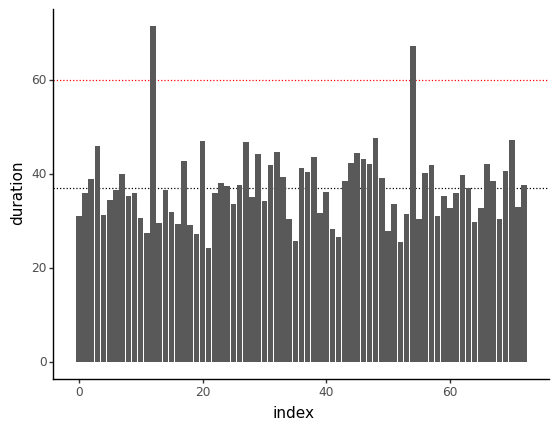

<ggplot: (166240402451)>

In [22]:
dur_dat = all_data.groupby(['sid']).aggregate('mean').reset_index().reset_index()[['index', 'duration', 'sid']]
print("Mean duration: {} minutes (min: {}; max: {}; sd: {}), criterion: {}".format(
    np.mean(dur_dat['duration']).round(), np.min(dur_dat['duration']).round(), np.max(dur_dat['duration']).round(),
    np.std(dur_dat['duration']).round(1), dur_criterion)
     )

g = (gg.ggplot(dur_dat, gg.aes('index', 'duration'))
     + gg.geom_hline(yintercept=np.mean(dur_dat['duration']), linetype='dotted')
     + gg.geom_hline(yintercept=dur_criterion, linetype='dotted', color='red')
     + gg.geom_bar(stat='identity')
     + gg.theme(legend_position='none')
    )
g

In [23]:
too_long = dur_dat.loc[dur_dat['duration'] > dur_criterion, 'sid'].values
too_long

array([26899, 37552], dtype=int64)

# Remove participants

In [24]:
all_data['chance_performer'] = all_data['sid'].isin(chance_performers)
all_data['inattentives'] = all_data['sid'].isin(inattentives)
all_data['psych_disorder'] = all_data['sid'].isin(psych_sids)
all_data['head_trauma'] = all_data['sid'].isin(trauma_sids)
all_data['pen_paper'] = all_data['sid'].isin(pen_paper_sids)
all_data['too_long'] = all_data['sid'].isin(too_long)

In [25]:
all_data_old = all_data.copy()

all_data = all_data.loc[
    np.invert(all_data['psych_disorder'] | all_data['head_trauma'] |
              all_data['inattentives'] | all_data['pen_paper'] | all_data['too_long'])
].drop(columns=['inattentives', 'psych_disorder', 'head_trauma', 'pen_paper', 'too_long'])
all_data

,rt,stimulus,key_press,trial_type,trial_index,time_elapsed,internal_node_id,phase,block,trial,...,count_star3,star_rule,star0_inplace,star1_inplace,star2_inplace,star3_inplace,sex,age_years,age_months,chance_performer
0,797.865,0.0,85.0,learning,297.0,2422963.0,0.0-77.0-0.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
1,654.720,0.0,73.0,learning,298.0,2423619.0,0.0-77.0-1.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
2,1317.900,0.0,79.0,learning,299.0,2424938.0,0.0-77.0-2.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
3,276.305,0.0,80.0,learning,300.0,2425216.0,0.0-77.0-3.0,high,0.0,0.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
4,823.310,0.0,85.0,learning,302.0,2426546.0,0.0-78.0-0.0,high,0.0,1.0,...,0,"[2, 3]",False,False,False,False,Female,21.0,6.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290971,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,7.0,23.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True
290972,884.860,0.0,79.0,transfer,2790.0,1240253.0,0.0-595.0-0.0,low,7.0,24.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True
290973,203.660,0.0,80.0,transfer,2791.0,1240463.0,0.0-595.0-1.0,low,7.0,24.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True
290974,262.600,0.0,73.0,transfer,2792.0,1240731.0,0.0-595.0-2.0,low,7.0,24.0,...,0,"[2, 1]",True,True,True,True,Male,18.0,10.0,True


# Demographics

## Before Excluding

In [26]:
q_sex = 'sex'

print('Number of Females: {}; Males: {}; Decline to answer: {}; Empty: {}'.format(
    np.sum(demo[q_sex] == "Female"), np.sum(demo[q_sex] == "Male"),
    np.sum(demo[q_sex] == "Decline to answer"), np.sum(demo[q_sex].apply(lambda x : type(x) != str))
))

Number of Females: 58; Males: 13; Decline to answer: 1; Empty: 1


In [27]:
num_dat = all_data_old.loc[all_data_old['phase'] == 'low'].groupby(['sid', 'phaseNum']).aggregate('mean').reset_index()[['sid', 'phaseNum']]

print('High transfer first: n={}; low transfer first: n={}'.format(
    np.sum(num_dat['phaseNum'] == 0), np.sum(num_dat['phaseNum'] == 1)))

High transfer first: n=36; low transfer first: n=37


In [31]:
demo['age'] = demo['age_years'] + demo['age_months'] / 12
print("Age: {} (sd: {}), min: {}, max: {}".format(
    np.mean(demo['age']).round(1), np.std(demo['age']).round(2), np.min(demo['age']).round(1), np.max(demo['age']).round(1),
))

Age: 20.6 (sd: 1.96), min: 18.1, max: 31.8


## After Excluding

In [29]:
demo_old = demo.copy()
demo = demo.loc[demo['sid'].isin(all_data['sid'])]

In [30]:
print('Number of Females: {}; Males: {}; Decline to answer: {}; Empty: {}'.format(
    np.sum(demo[q_sex] == "Female"), np.sum(demo[q_sex] == "Male"),
    np.sum(demo[q_sex] == "Decline to answer"), np.sum(demo[q_sex].apply(lambda x : type(x) != str))
))

Number of Females: 45; Males: 10; Decline to answer: 1; Empty: 0


In [31]:
demo['age'] = demo['age_years'] + demo['age_months'] / 12
print("Age: {} (sd: {}), min: {}, max: {}".format(
    np.mean(demo['age']).round(1), np.std(demo['age']).round(2), np.min(demo['age']).round(1), np.max(demo['age']).round(1),
))

Age: 20.6 (sd: 1.96), min: 18.1, max: 31.8


In [32]:
num_dat = all_data.loc[all_data['phase'] == 'low'].groupby(['sid', 'phaseNum']).aggregate('mean').reset_index()[['sid', 'phaseNum']]

print('High transfer first: n={}; low transfer first: n={}'.format(
    np.sum(num_dat['phaseNum'] == 0), np.sum(num_dat['phaseNum'] == 1)))

High transfer first: n=26; low transfer first: n=30


In [33]:
print(
    "Average missed trials: {} (sd: {}); min: {}, max: {}, criterion: {}".format(
        np.mean(d['timeout']).round(1), np.std(d['timeout']).round(2),
        np.min(d['timeout']).round(1), np.max(d['timeout']).round(1), 
        max_missed_trials_inattentive)
)

Average missed trials: 17.7 (sd: 24.06); min: 1.0, max: 158.0, criterion: 50


Mean duration: 36.0 minutes (min: 26.0; max: 46.0; sd: 5.3)


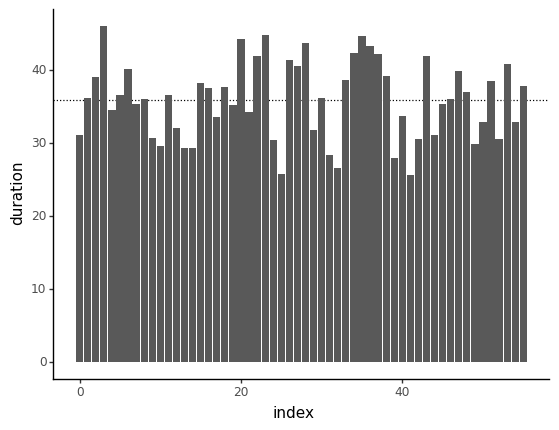

<ggplot: (166240333990)>

In [34]:
dur_dat = all_data.groupby(['sid']).aggregate('mean').reset_index().reset_index()[['index', 'duration', 'sid']]
print("Mean duration: {} minutes (min: {}; max: {}; sd: {})".format(
    np.mean(dur_dat['duration']).round(), np.min(dur_dat['duration']).round(), np.max(dur_dat['duration']).round(), np.std(dur_dat['duration']).round(1))
     )

g = (gg.ggplot(dur_dat, gg.aes('index', 'duration'))
     + gg.geom_hline(yintercept=np.mean(dur_dat['duration']), linetype='dotted')
     + gg.geom_bar(stat='identity')
     + gg.theme(legend_position='none')
    )
g

## Save data

In [35]:
all_data.to_csv(os.path.join(data_dir, 'all_data.csv'))